<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_ANN_r_squared_jul_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 8.4MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 165.33 MiB | 7.81 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     140  156.039993  171.959991  ...  136.119995  119.759995  152.639999
1     160  111.955620  118.146873  ...    0.760000    0.255625    1.380625
2     122  197.216324  189.130325  ...  145.066910  144.452026  146.084366
3     123   96.264542  102.217072  ...    0.092471    0.645317    1.507106
4     135   22.701454   40.158680  ...  159.662857  156.588791  157.535843
5     139  160.027573  171.555969  ...  166.158890  176.880112  179.000305
6     191  185.573456  167.517365  ...  148.313675  158.257416  138.457352
7     176  100.928200   94.346077  ...  162.780975  175.279449  181.319748
8     145  173.276581  106.161911  ...    1.000000    1.155815    0.563187
9     101  247.234100  252.308304  ...  147.065384  143.124298  142.268311
10    104    0.590237    0.365385  ...    1.307693    1.000000    1.000000
11    148   45.374001   40.619431  ...    0.576333    0.360117    1.414171
12    183   47.640064   4

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
3   141.0   50.641567   36.600327  ...    0.976058    0.371863    0.597203
14  199.0   79.184654   96.089134  ...    0.000000    0.000000    0.000000
41  147.0   33.097504   60.467121  ...   55.133785   55.340134   58.206352
47  191.0   94.236153   99.240181  ...   67.620026   67.555168   66.736664
4   198.0   70.166916   76.122437  ...   90.563705   86.661148   85.031517
11  144.0   74.601082   75.760796  ...  109.513885  113.733032  123.481476
28  129.0  198.478149  162.213028  ...   84.898499   86.812149   87.349380
42  124.0   24.646200   26.254940  ...   45.613941   50.053066   52.185219
7   196.0   66.102043   68.571426  ...   44.918365   43.387753   39.632652
26  127.0   85.680450   87.920395  ...  112.400589  114.940918  115.879715
46  168.0  110.027779   42.583332  ...   88.194443   86.277779   86.277779
5   196.0   11.857142   11.408163  ...   61.428570   60.551018   55.285713
23  199.0   93.497002   9

In [13]:
Width=np.array(Width_new)

In [14]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (373/373), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 612 (delta 230), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (612/612), 5.24 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (367/367), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [15]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [16]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [17]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,141.0,50.641567,36.600327,29.769278,30.565113,34.888893,36.401791,36.882854,38.650871,40.849354,41.548317,41.217945,43.358486,45.357021,46.068562,46.178310,44.664608,44.147079,43.704742,40.192596,40.934010,35.418739,22.912127,5.047684,1.065288,0.221317,0.004225,0.000000,0.000000,47.021030,30.638851,27.677935,35.623508,39.816708,39.551430,36.642830,39.347416,41.228409,42.625927,47.442085,...,57.344353,55.577133,52.953472,51.476688,56.408730,59.039989,55.850159,36.177002,5.697048,0.979176,0.963382,0.766209,54.585884,54.832653,54.919674,53.719227,52.467636,50.822647,49.987125,52.360748,53.759270,53.891148,52.024399,52.849106,54.769577,56.291634,56.382427,54.790249,54.856445,52.491474,50.660633,50.942711,54.714249,58.545849,54.367840,37.051304,10.244404,0.976058,0.371863,0.597203
14,199.0,79.184654,96.089134,96.979546,98.300011,99.144005,96.438019,96.484482,102.159081,103.594025,104.670250,102.949730,96.597404,74.066101,43.602177,40.487389,40.766670,39.788868,37.814167,35.972198,38.373749,41.772453,41.872807,41.678291,30.126863,13.544255,6.891695,1.542966,0.304967,86.828568,92.354126,92.920403,94.712776,91.390015,93.071281,96.788361,101.137032,104.726570,109.547249,112.546036,...,0.000000,0.000000,0.488877,1.039065,1.187495,0.674276,0.723770,0.209742,0.010303,0.000000,0.000000,0.000000,0.178177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122320,0.604833,0.328477,0.153430,0.002121,0.000000,0.000000,0.000000,0.000000,0.000000
41,147.0,33.097504,60.467121,79.106583,86.140587,89.532883,88.702942,88.092972,88.219963,89.673470,89.115646,88.870750,88.240372,84.909302,80.396835,80.358276,83.460312,84.507942,85.088440,88.768715,91.503403,92.136047,87.446701,84.077103,76.929703,65.614517,50.104309,44.115646,41.970524,50.013607,71.179146,79.351479,84.952385,88.154198,86.988663,86.632660,87.276649,86.689346,82.548759,83.079376,...,110.498871,112.730164,110.020409,97.616783,75.666672,58.823132,54.643993,50.376419,49.727894,48.952381,47.575970,52.909302,224.294800,105.428574,89.489799,101.049896,98.530609,99.655342,100.043091,102.315193,103.857147,104.804985,103.591843,97.913834,97.526085,100.541962,104.566902,107.451248,110.190483,114.081635,114.913841,109.185936,97.707489,73.426308,63.070297,52.780045,52.852608,55.133785,55.340134,58.206352
47,191.0,94.236153,99.240181,95.726059,87.705170,77.304131,81.369766,82.132454,87.139069,91.077667,93.550461,86.785736,66.530853,63.345821,55.879585,45.444153,41.794743,38.618980,34.555332,35.067379,48.187469,67.536560,85.389084,95.306244,106.317299,118.036102,124.840797,134.795578,154.790802,95.296867,101.730133,94.320068,84.066223,80.990273,82.265625,84.062782,86.488205,88.851242,95.353752,92.181137,...,55.964314,58.618515,53.212662,47.415180,47.593880,51.546455,58.487274,64.936165,67.716415,68.010704,69.249313,68.447472,84.051506,79.719994,76.817467,85.015930,96.180702,100.849167,106.701736,102.985443,67.527565,63.475864,64.231247,68.517426,76.360573,82.206802,72.002663,59.830685,58.538418,58.281956,55.318413,52.438499,49.600124,52.422470,60.387001,67.678963,68.598076,67.620026,67.555168,66.736664
4,198.0,70.166916,76.122437,77.155998,72.927864,75.496574,84.919083,85.567894,84.357399,84.206406,88.928368,92.580643,91.143242,88.358833,72.390060,55.661564,58.685333,59.149670,60.731762,61.555962,55.799000,57.104984,58.431992,62.264557,58.754101,59.620850,68.912552,71.138855,70.898270,84.114265,82.286087,81.434341,78.489326,81.556152,91.011322,91.074677,89.855209,89.917465,93.020401,93.314453,...,51.230274,57.916534,61.422504,63.821648,62.444138,58.598000,79.899391,85.999374,84.698593,84.521469,84.800934,86.013870,115.355255

In [18]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

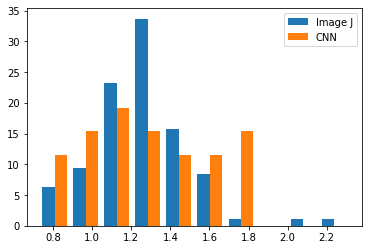

In [19]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

r_squared = 0.9413759272611912


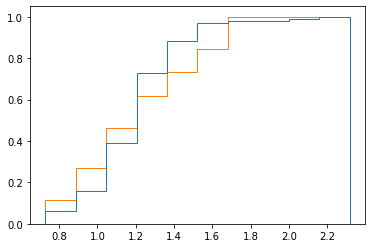

In [20]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
print('r_squared =',r2_score(Y1, Y2))

<a list of 2 Lists of Patches objects>
[0.72804636 0.88698565 1.04592493 1.20486421 1.36380349 1.52274278
 1.68168206 1.84062134 1.99956062 2.15849991 2.31743919]
[[ 6.31578947  9.47368421 23.15789474 33.68421053 15.78947368  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [11.53846154 15.38461538 19.23076923 15.38461538 11.53846154 11.53846154
  15.38461538  0.          0.          0.        ]]


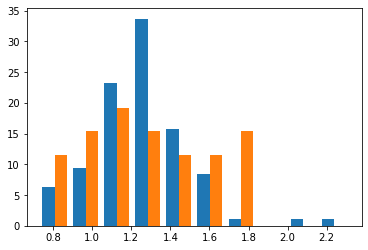

In [21]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [22]:
print(counts.sum())

200.00000000000006


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


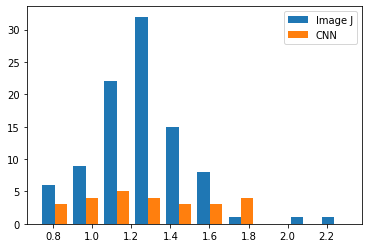

In [23]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [24]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1